In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("billbasener/coronary-heart-disease")

print("Path to dataset files:", path)

100%|██████████| 7.62k/7.62k [00:00<00:00, 11.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/billbasener/coronary-heart-disease/versions/1


In [2]:
!pip install scikeras

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU
from scikeras.wrappers import KerasClassifier

In [4]:
df = pd.read_csv(path + "/CHDdata.csv")
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [5]:
df.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [7]:
df.isnull().sum()

,0
sbp,0
tobacco,0
ldl,0
adiposity,0
famhist,0
typea,0
obesity,0
alcohol,0
age,0
chd,0


In [8]:
df['famhist'].unique()

array(['Present', 'Absent'], dtype=object)

In [9]:
df['famhist'] = df['famhist'].map({'Present': 1, 'Absent': 0})

In [10]:
df.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


In [11]:
sns.pairplot(df, hue='chd')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [12]:
X = df.drop('chd', axis=1)
y = df['chd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6989247311827957
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        59
           1       0.61      0.50      0.55        34

    accuracy                           0.70        93
   macro avg       0.67      0.66      0.66        93
weighted avg       0.69      0.70      0.69        93



In [17]:
importances = model.feature_importances_
feature_names = df.drop('chd', axis=1).columns

sorted_indices = importances.argsort()[::-1]
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

age: 0.1599
tobacco: 0.1399
ldl: 0.1295
typea: 0.1147
adiposity: 0.1119
sbp: 0.1114
obesity: 0.1091
alcohol: 0.0860
famhist: 0.0377


In [18]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [19]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation=LeakyReLU(alpha=0.1) , kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(64, activation=LeakyReLU(alpha=0.1), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation=LeakyReLU(alpha=0.1), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)#, callbacks=[early_stopping]

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6474 - loss: 2.0866 - val_accuracy: 0.6757 - val_loss: 1.9806
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6590 - loss: 1.9615 - val_accuracy: 0.6351 - val_loss: 1.8756
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7435 - loss: 1.8229 - val_accuracy: 0.6486 - val_loss: 1.7792
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6924 - loss: 1.7433 - val_accuracy: 0.6486 - val_loss: 1.6919
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6814 - loss: 1.6391 - val_accuracy: 0.6351 - val_loss: 1.6115
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7062 - loss: 1.5719 - val_accuracy: 0.6622 - val_loss: 1.5361
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6959 - loss: 1.5041 - val_accuracy: 0.6757 - val_loss: 1.4669
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7368 - loss: 1.4105 - val_accuracy: 0.7297

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

y_pred = (model.predict(X_test) > 0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7777 - loss: 0.5970 
Test Accuracy: 0.77
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


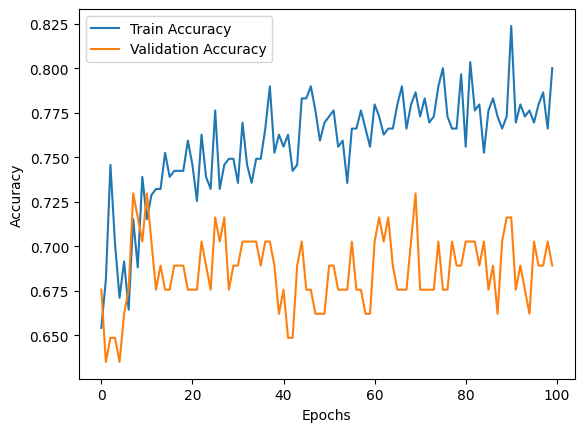

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

ترکیب کردن mlp و decisiontree و XGboost

In [24]:
def create_model():
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [25]:
mlp = KerasClassifier(model=create_model, epochs=500, batch_size=128, verbose=1)

In [26]:
  estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=25)),
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('mlp', mlp)
]

In [27]:
meta_model = LogisticRegression()

In [28]:
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model)

In [ ]:
stacking_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3983 - loss: 0.7698
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4935 - loss: 0.7123 
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5420 - loss: 0.6925 
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6355 - loss: 0.6515 
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6658 - loss: 0.6464
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6669 - loss: 0.6249  
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6819 - loss: 0.6107  
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6716 - loss: 0.5995  
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7142 - loss: 0.5916  
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6920 - loss: 0.5991 
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6745 - loss: 0.5806 
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6898 - loss: 0.5872

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:27:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4491 - loss: 0.7261
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5825 - loss: 0.6799 
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6048 - loss: 0.6655 
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6559 - loss: 0.6600 
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6788 - loss: 0.6307 
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6720 - loss: 0.6248 
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6879 - loss: 0.6233 
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5907 
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6374 - loss: 0.6190 
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7128 - loss: 0.5582 
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7345 - loss: 0.5661 
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5524 
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4471 - loss: 0.7297
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4682 - loss: 0.7098  
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5733 - loss: 0.6677 
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6524 - loss: 0.6336  
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6341 - loss: 0.6207 
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6644 - loss: 0.6265 
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6818 - loss: 0.6014 
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6584 - loss: 0.6024 
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6564 - loss: 0.5787 
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6922 - loss: 0.5798 
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6647 - loss: 0.5902 
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7272 - loss: 0.5490 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4991 - loss: 0.7233
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5563 - loss: 0.6902 
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5988 - loss: 0.6626 
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5910 - loss: 0.6521  
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6801 - loss: 0.6277 
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6657 - loss: 0.6174 
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6922 - loss: 0.5840 
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7225 - loss: 0.5878 
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6898 - loss: 0.5926 
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6978 - loss: 0.5602 
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6968 - loss: 0.5866 
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6883 - loss: 0.5545 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5997 - loss: 0.6841
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6217 - loss: 0.6761 
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6336 - loss: 0.6512 
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6939 - loss: 0.6318  
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6381 - loss: 0.6366 
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7209 - loss: 0.5994 
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6847 - loss: 0.5737 
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6902 - loss: 0.5836 
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6760 - loss: 0.5765 
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7270 - loss: 0.5750 
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7175 - loss: 0.5447 
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6912 - l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5925 - loss: 0.6775
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6756 - loss: 0.6400  
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6769 - loss: 0.6273  
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6711 - loss: 0.6075  
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6881 - loss: 0.5920 
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6695 - loss: 0.5954 
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7049 - loss: 0.5721 
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7099 - loss: 0.5627 
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7040 - loss: 0.5650 
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7322 - loss: 0.5514 
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7066 - loss: 0.5369 
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6988 - l

StackingClassifier(estimators=[('decision_tree',
                                DecisionTreeClassifier(max_depth=25)),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('mlp',
                                KerasClassifier(batch_size=128, epochs=500, model=<function create_model at 0x793ed1b1ba30>))],
                   final_estimator=LogisticRegression())

In [ ]:
accuracy = stacking_model.score(X_test, y_test)
print(f"Stacking Model Accuracy: {accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Stacking Model Accuracy: 0.72
